In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('tmpjqutrb5f.csv')

In [4]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192057955,3115,Investigate Person,INVESTIGATE PERSON,D4,627,NaN,2019-07-26 19:56:00,2019,7,Friday,19,Part Three,KILMARNOCK ST,42.343535,-71.099801,"(42.34353469, -71.09980109)"
1,I192057953,619,Larceny,LARCENY ALL OTHERS,B3,434,NaN,2019-07-26 21:00:00,2019,7,Friday,21,Part One,EVANS ST,42.282293,-71.080889,"(42.28229312, -71.08088944)"
2,I192057944,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,E13,574,NaN,2019-07-26 20:48:00,2019,7,Friday,20,Part Three,WASHINGTON ST,42.309719,-71.104294,"(42.30971857, -71.10429432)"
3,I192057942,619,Larceny,LARCENY ALL OTHERS,D14,800,NaN,2019-07-26 19:00:00,2019,7,Friday,19,Part One,ASHFORD ST,42.354319,-71.129017,"(42.35431862, -71.12901674)"
4,I192057939,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,D4,166,NaN,2019-07-26 15:00:00,2019,7,Friday,15,Part Two,SHAWMUT AVE,42.341775,-71.071245,"(42.34177501, -71.07124466)"


In [5]:
df_year_month = df.groupby(['YEAR','MONTH']).size().to_frame()
df_year_month = df_year_month.reset_index()

In [6]:
df_year_month['CRIME INCIDENT'] = df_year_month[0]

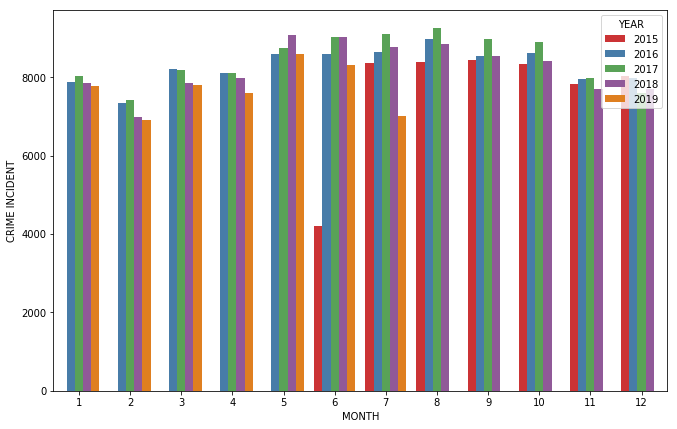

In [7]:
plt.figure(figsize=(11,7))
crime_plot = sns.barplot(x='MONTH', y='CRIME INCIDENT', hue='YEAR',data=df_year_month,palette='Set1')
crime_plot.figure.savefig("Boston_crime.png")

In [8]:
df_2015 = df[df['YEAR']==2015].groupby('MONTH').count().reset_index()
df_2016 = df[df['YEAR']==2016].groupby('MONTH').count().reset_index()
df_2017 = df[df['YEAR']==2017].groupby('MONTH').count().reset_index()
df_2018 = df[df['YEAR']==2018].groupby('MONTH').count().reset_index()
df_2019 = df[df['YEAR']==2019].groupby('MONTH').count().reset_index()

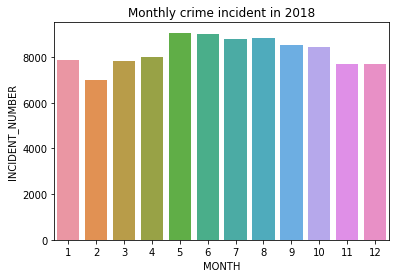

In [9]:
crime_plot_2018 = sns.barplot(x='MONTH', y='INCIDENT_NUMBER',data=df_2018).set_title("Monthly crime incident in 2018")
crime_plot_2018.figure.savefig("Boston_crime_2018.png")

In [10]:
df_2018_July = df[(df['YEAR']==2018) & 
                  (df['MONTH']==7) & 
                  (df['OFFENSE_CODE_GROUP'] == 'Drug Violation')].groupby('DAY_OF_WEEK').count().reset_index()

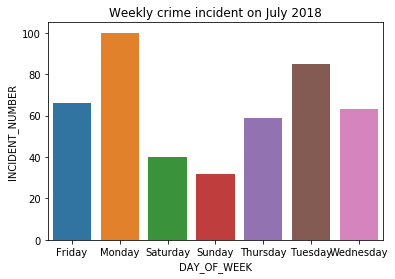

In [11]:
crime_plot_2018_July = sns.barplot(x='DAY_OF_WEEK', y='INCIDENT_NUMBER',data=df_2018_July).set_title("Weekly crime incident on July 2018")
crime_plot_2018_July.figure.savefig("Boston_crime_2018_July.png")

In [12]:
df_2018_July_Tue = df[(df['YEAR']==2018) & 
                      (df['MONTH']==7) & 
                      (df['DAY_OF_WEEK']=='Monday') & 
                      (df['OFFENSE_CODE_GROUP'] == 'Drug Violation')].groupby('HOUR').count().reset_index()

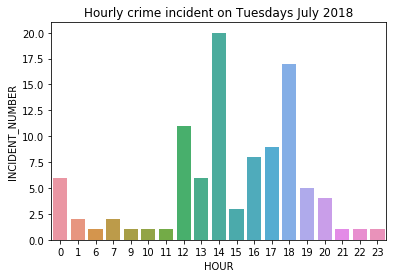

In [13]:
crime_plot_2018_July_Tue = sns.barplot(x='HOUR', y='INCIDENT_NUMBER',data=df_2018_July_Tue).set_title("Hourly crime incident on Tuesdays July 2018")
crime_plot_2018_July_Tue.figure.savefig("Boston_crime_2018_July_Tuesday.png")